<a href="https://colab.research.google.com/github/earthlovebpt/myprojects/blob/main/Fake_face_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1g2ZzE9kztY9QeLIMvtDFm9Mk9D2YikUF)
# You can download dataset through this link [kaggle dataset](https://www.kaggle.com/xhlulu/140k-real-and-fake-faces).

# 0. Setup

In [ ]:
# Check GPU.
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11957216873421993561
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16154099712
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 275126864536049682
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cp /content/drive/MyDrive/projects/fake-face-detection/archive.zip /content/face.zip
! unzip -qq /content/face.zip

In [ ]:
! pip3 install mtcnn

     |████████████████████████████████| 2.3 MB 4.1 MB/s 


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau

from mtcnn.mtcnn import MTCNN
import cv2
from tqdm import tqdm_notebook as tq

#1. EDA

In [ ]:
path = '/content/real_vs_fake/real-vs-fake'

# Show the sample images.
def plot_img(path, class_):
    dir_ = os.path.join(path, 'train', class_)
    k = 0
    fig, ax = plt.subplots(3,3, figsize=(10,10))
    for j in range(3):
        for i in range(3):
            img = load_img(os.path.join(dir_, os.listdir(os.path.join(dir_))[k]))          
            ax[j,i].imshow(img)
            ax[j,i].set_title("")
            ax[j,i].axis('off')
            k +=1
    fig.tight_layout()
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

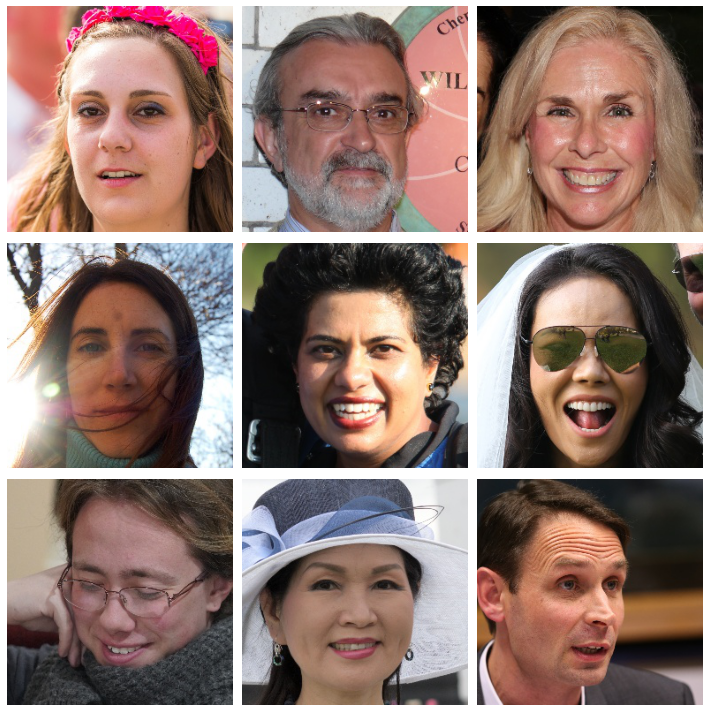

In [ ]:
plot_img(path, 'real')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

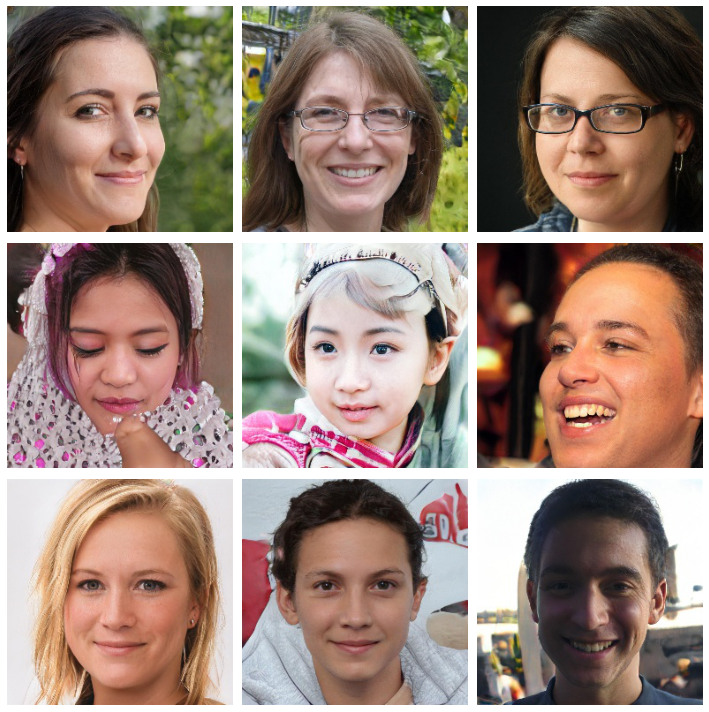

In [ ]:
plot_img(path, 'fake')

real    50000
fake    50000
Name: label_str, dtype: int64


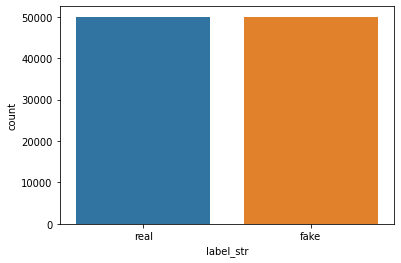

In [ ]:
# Show the number of Fake and Real face images.
train_df = pd.read_csv('/content/train.csv')
print(train_df['label_str'].value_counts())
sns.countplot(data=train_df, x='label_str')
plt.show()

#2. Face detection

In [ ]:
os.listdir('/content/real_vs_fake/real-vs-fake/train/real')[0]

'28038.jpg'

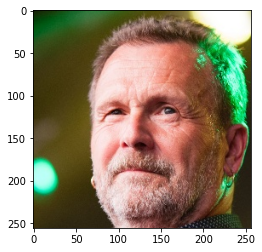

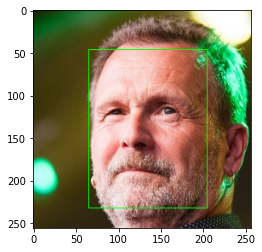

In [ ]:
# Read the sample image.
filename = '/content/real_vs_fake/real-vs-fake/train/real/44513.jpg'
img = cv2.imread(filename)

# Detect faces.
detector = MTCNN()
faces = detector.detect_faces(img)
x, y, w, h = faces[0]['box']

# Show the images.
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 1), cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Create folder.
! mkdir crop_img
! mkdir crop_img/train crop_img/train/real crop_img/train/fake
! mkdir crop_img/val crop_img/val/real crop_img/val/fake
! mkdir crop_img/test crop_img/test/real crop_img/test/fake

mkdir: cannot create directory ‘crop_img’: File exists
mkdir: cannot create directory ‘crop_img/train’: File exists
mkdir: cannot create directory ‘crop_img/train/real’: File exists
mkdir: cannot create directory ‘crop_img/train/fake’: File exists
mkdir: cannot create directory ‘crop_img/val’: File exists
mkdir: cannot create directory ‘crop_img/val/real’: File exists
mkdir: cannot create directory ‘crop_img/val/fake’: File exists
mkdir: cannot create directory ‘crop_img/test’: File exists
mkdir: cannot create directory ‘crop_img/test/real’: File exists
mkdir: cannot create directory ‘crop_img/test/fake’: File exists


In [ ]:
# Crop training images.
path = '/content/real_vs_fake/real-vs-fake/train/'
folders = os.listdir(path)

# Iterate over the folder and detect and crop faces and save them in respective folder.
for subs in folders:
    for files in tq(os.listdir(path+subs)[:10000]):
        try:
            if subs=='fake':
                img = cv2.imread(path+subs+'/'+files)
                faces = detector.detect_faces(img)
                x, y, w, h = faces[0]['box']
                cv2.imwrite('/content/crop_img/train/fake/'+files, img[y:y+h, x:x+w])     
            elif subs=='real':
                img = cv2.imread(path+subs+'/'+files)
                faces = detector.detect_faces(img)
                x, y, w, h = faces[0]['box']
                cv2.imwrite('/content/crop_img/train/real/'+files, img[y:y+h, x:x+w])
        except:
            print('error')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/10000 [00:00<?, ?it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  0%|          | 0/10000 [00:00<?, ?it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

In [ ]:
# Crop validation images.
path = '/content/real_vs_fake/real-vs-fake/valid/'
folders = os.listdir(path)

# Iterate over the folder and detect and crop faces and save them in respective folder.
for subs in folders:
    for files in tq(os.listdir(path+subs)[:2000]):
        try:
            if subs=='fake':
                img = cv2.imread(path+subs+'/'+files)
                faces = detector.detect_faces(img)
                x, y, w, h = faces[0]['box']
                cv2.imwrite('/content/crop_img/val/fake/'+files, img[y:y+h, x:x+w])     
            elif subs=='real':
                img = cv2.imread(path+subs+'/'+files)
                faces = detector.detect_faces(img)
                x, y, w, h = faces[0]['box']
                cv2.imwrite('/content/crop_img/val/real/'+files, img[y:y+h, x:x+w])
        except:
            print('error')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/2000 [00:00<?, ?it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  0%|          | 0/2000 [00:00<?, ?it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


In [ ]:
# Crop testing images.
path = '/content/real_vs_fake/real-vs-fake/test/'
folders = os.listdir(path)

# Iterate over the folder and detect and crop faces and save them in respective folder.
for subs in folders:
    for files in tq(os.listdir(path+subs)[:2000]):
        try:
            if subs=='fake':
                img = cv2.imread(path+subs+'/'+files)
                faces = detector.detect_faces(img)
                x, y, w, h = faces[0]['box']
                cv2.imwrite('/content/crop_img/test/fake/'+files, img[y:y+h, x:x+w])     
            elif subs=='real':
                img = cv2.imread(path+subs+'/'+files)
                faces = detector.detect_faces(img)
                x, y, w, h = faces[0]['box']
                cv2.imwrite('/content/crop_img/test/real/'+files, img[y:y+h, x:x+w])
        except:
            print('error')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/2000 [00:00<?, ?it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  0%|          | 0/2000 [00:00<?, ?it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


#3. Create the CNN model

In [ ]:
batch_size = 100
target_size = (224,224)
path = '/content/real_vs_fake/real-vs-fake'

generator = ImageDataGenerator()

# Prepare training dataset.
training_set = generator.flow_from_directory(path+'/train', target_size=target_size, batch_size=batch_size, class_mode='binary')

# Prepare validation dataset.
val_set = generator.flow_from_directory(path +'/valid', target_size=target_size, batch_size=batch_size, class_mode='binary')

# Prepare testing dataset.
test_set = generator.flow_from_directory(path+'/test', target_size=target_size, batch_size=batch_size, shuffle=False, class_mode='binary')

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
base_model = EfficientNetB0( weights='imagenet', include_top=False, input_shape=(224,224,3) )

# Create the model.
model = Sequential([ 
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1, activation='sigmoid')
    ])

# Compile the model.
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])

# Print the model summary.
model.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_23 (Dense)            (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 4,008,829
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
# Save the best model.
checkpoint = ModelCheckpoint(filepath='best_model.h5',
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss'
                            )

# Reduce lr when val_loss does not decrease.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=3, 
                              verbose=1, 
                              min_delta=0.0001
                             )

# Save log file.
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

In [ ]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = val_set.n // val_set.batch_size

# Train the model
hist = model.fit(training_set,
                    validation_data=val_set,
                    callbacks=callbacks,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    epochs=10
                   )

Epoch 1/10
1000/1000 [==============================] - ETA: 0s - loss: 0.0499 - accuracy: 0.9808
Epoch 1: val_loss improved from inf to 0.01924, saving model to best_model.h5
1000/1000 [==============================] - 697s 686ms/step - loss: 0.0499 - accuracy: 0.9808 - val_loss: 0.0192 - val_accuracy: 0.9923 - lr: 0.0010
Epoch 2/10
1000/1000 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9951
Epoch 2: val_loss did not improve from 0.01924
1000/1000 [==============================] - 683s 683ms/step - loss: 0.0140 - accuracy: 0.9951 - val_loss: 0.0273 - val_accuracy: 0.9907 - lr: 0.0010
Epoch 3/10
1000/1000 [==============================] - ETA: 0s - loss: 0.0114 - accuracy: 0.9961
Epoch 3: val_loss improved from 0.01924 to 0.01446, saving model to best_model.h5
1000/1000 [==============================] - 684s 683ms/step - loss: 0.0114 - accuracy: 0.9961 - val_loss: 0.0145 - val_accuracy: 0.9955 - lr: 0.0010
Epoch 4/10
1000/1000 [===========================

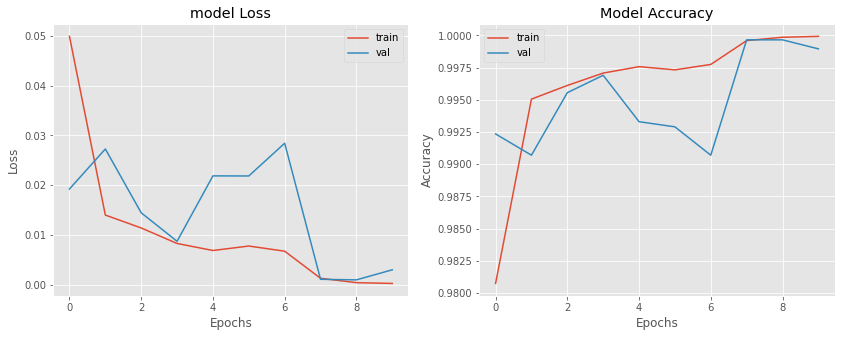

In [ ]:
def plot_history():
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,2)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'val'])

  plt.subplot(1,2,1)
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['train', 'val'])
  plt.show()

plt.style.use('ggplot')
plot_history()

#4. Model evaluation

In [ ]:
# Load the best model
model = tf.keras.models.load_model('best_model.h5')

In [ ]:
# Evaluate model on test set,
model.evaluate(test_set)

200/200 [==============================] - 45s 223ms/step - loss: 0.0033 - accuracy: 0.9990
Final Test Acccuracy = 99.900


In [ ]:
# Predict the test set.
y_pred = model.predict(test_set)
y_test = test_set.classes

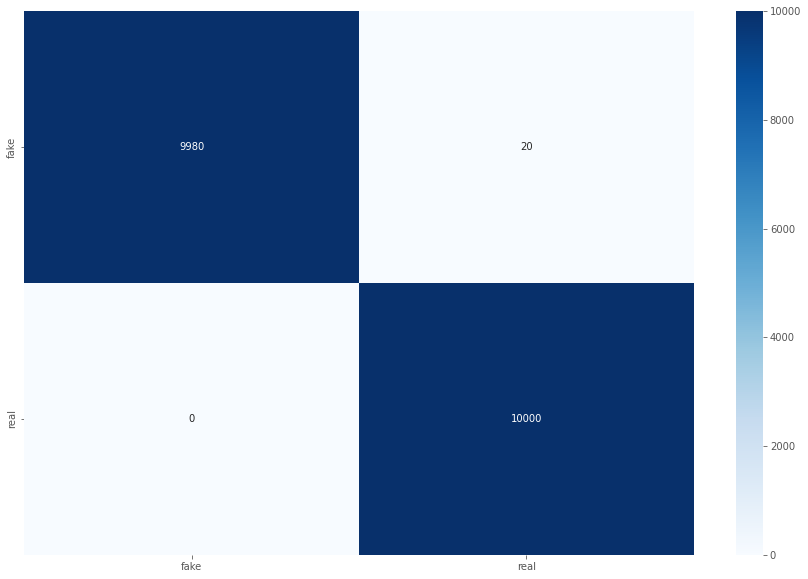

In [ ]:
# Show confusion matrix.
labels = ['fake', 'real']
plt.figure(figsize = (15,10))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred>0.5), annot = True,fmt="d",cmap = "Blues", xticklabels=labels, yticklabels=labels)
plt.show()

In [ ]:
# Show confusion report.
print(metrics.classification_report(y_test, y_pred>0.5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

